<a href="https://colab.research.google.com/github/Qasaiemh/Quality_Supply_Chain_Assignment/blob/Q.3.5/Q_3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Generate a matrix of charts with 2 rows and 5 columns (max.) containing the scatter plots of top 5 variable pairs that show positive correlation (1st row) and top 5 variable pairs that show negative correlation (2nd row)

In [2]:
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
csv_file_path = '/content/question_3.csv'
df_csv = pd.read_csv(csv_file_path)

# Step 2: Display the contents of the DataFrame
print(df_csv)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

<ipython-input-3-efc1f45e22ca>:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


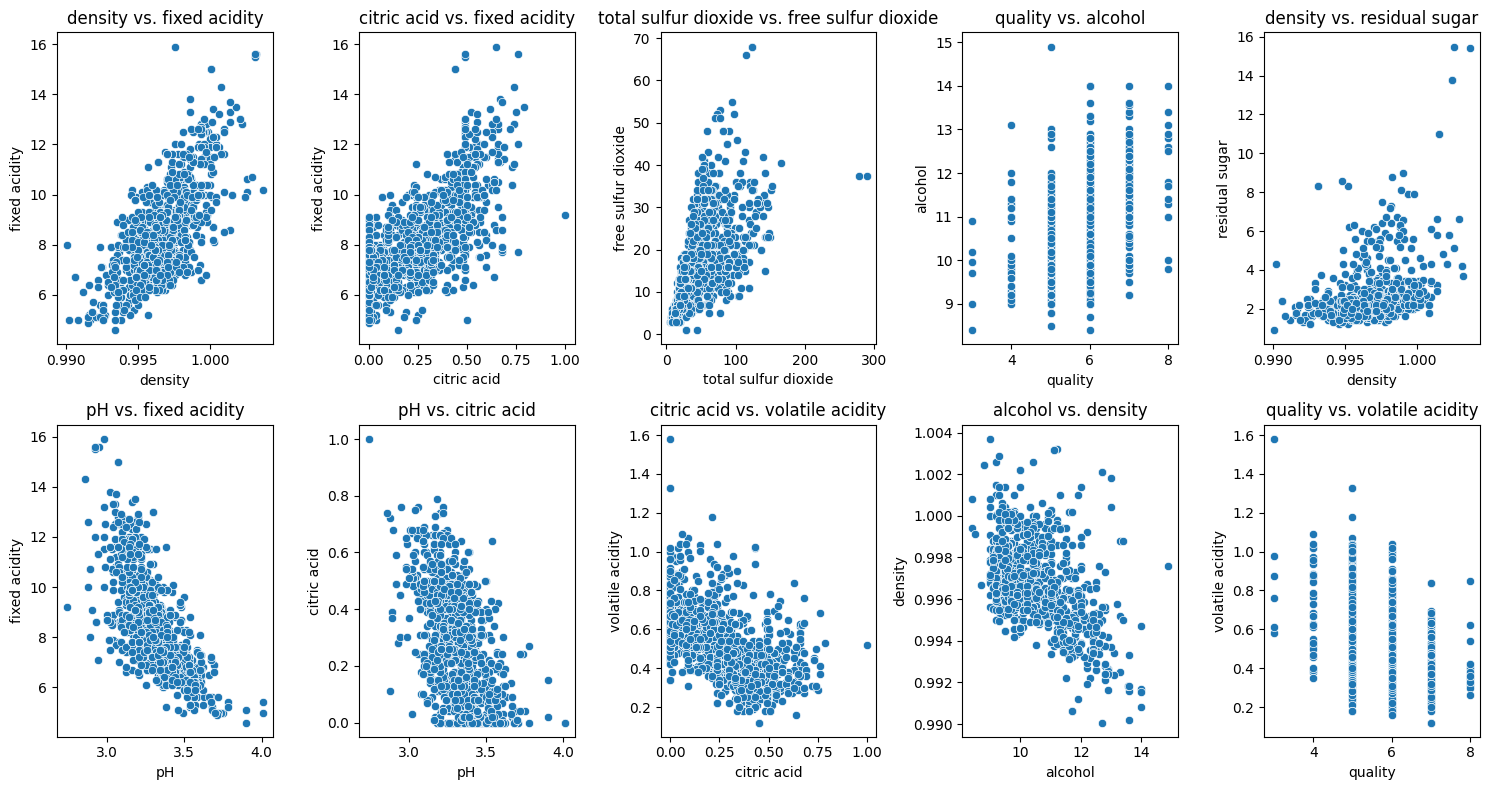

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Drop the 'ID' column
df.drop(columns=['Id'], inplace=True)

# Calculate the Pearson's correlation coefficient
correlation_matrix = df.corr()

# Get the upper triangular part of the correlation matrix to avoid duplicate pairs
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

# Find the top 5 positive and negative correlations
top_positive_correlations = upper_triangle.unstack().sort_values(ascending=False)[:5]
top_negative_correlations = upper_triangle.unstack().sort_values(ascending=True)[:5]

# List of top 5 positive and negative correlation pairs
positive_pairs = list(top_positive_correlations.index)
negative_pairs = list(top_negative_correlations.index)

# Create a matrix of scatter plots
plt.figure(figsize=(15, 8))

# Plot top 5 positive correlation scatter plots
for i, pair in enumerate(positive_pairs, 1):
    plt.subplot(2, 5, i)
    var1, var2 = pair
    sns.scatterplot(data=df, x=var1, y=var2)
    plt.title(f"{var1} vs. {var2}")

# Plot top 5 negative correlation scatter plots
for i, pair in enumerate(negative_pairs, 6):
    plt.subplot(2, 5, i)
    var1, var2 = pair
    sns.scatterplot(data=df, x=var1, y=var2)
    plt.title(f"{var1} vs. {var2}")

plt.tight_layout()
plt.show()
